In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
file_path = r"C:\Users\RSMre\OneDrive\Desktop\Year 4 Semester 2\Machine Intelligence\Data\SURVEY RESULTS_2024.xlsx"
data = pd.read_excel(file_path)

# Handle Missing Values
# For simplicity, fill missing values for categorical columns with 'Unknown'
data_filled = data.fillna('Unknown')

# Encode Categorical Variables
# Convert age groups into an ordinal scale
age_groups = {
    '20-30': 1, '31-40': 2, '41-50': 3, '51-60': 4, '61-70': 5, '71-80': 6
}
data_filled['Which age group do you belong to?'] = data_filled['Which age group do you belong to?'].map(age_groups)

# Using LabelEncoder for binary or ordinal categories
label_encoder = LabelEncoder()
data_filled['What is your gender?'] = label_encoder.fit_transform(data_filled['What is your gender?'])
data_filled['Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)'] = label_encoder.fit_transform(data_filled['Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)'])

# One-hot encode the rest of the categorical variables, excluding open-ended responses
# First, we'll drop the column with open-ended responses to simplify our PCA preparation
data_filled.drop(columns=['Please give us any design ideas to make the car uniquely Singaporean.'], inplace=True)

# Identify remaining categorical columns to be one-hot encoded
categorical_columns = data_filled.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data_filled = pd.get_dummies(data_filled, columns=categorical_columns, drop_first=True)

# The dataset is now prepared and ready for PCA
print(data_filled.head())


   Which age group do you belong to?  What is your gender?  \
0                                  1                     1   
1                                  1                     0   
2                                  1                     1   
3                                  1                     0   
4                                  1                     1   

   Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)  \
0                                                  0                                                                        
1                                                  0                                                                        
2                                                  1                                                                        
3                                                  0                                                                        
4 

In [12]:
data_filled

,Which age group do you belong to?,What is your gender?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Which category do you currently belong to?_Own a car,Which category do you currently belong to?_Own more than one car,Which of the following best describes you?_Married with no children,Which of the following best describes you?_Single,Which of these factors are important to you when deciding which car to purchase?_Brand name;Aesthetics;Functionality;Size,Which of these factors are important to you when deciding which car to purchase?_Brand name;Technological features;Functionality;Customisable options,Which of these factors are important to you when deciding which car to purchase?_Brand name;Technological features;Functionality;Sustainability/environment considerations,...,"Which of the following interior components would you choose to customise (texture, layout, size, etc)? _Steering wheel;Door handles;Dashboard",How much are you willing to spend on car customisation if surcharges are applicable?_100-500,How much are you willing to spend on car customisation if surcharges are applicable?_500-1000,How much are you willing to spend on car customisation if surcharges are applicable?_over 1000,How much are you willing to spend on car customisation if surcharges are applicable?_under 500,Are you interested in designing your own components to personalise your car? _Only with professional help,Are you interested in designing your own components to personalise your car? _Yes,How much are you willing to pay for the personalised design? _500-1000,How much are you willing to pay for the personalised design? _over 1000,How much are you willing to pay for the personalised design? _under 500
0,1,1,0,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0,0,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,True
2,1,1,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
3,1,0,0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,1,1,0,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
5,1,1,0,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
6,1,1,0,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
7,4,0,0,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
8,1,1,0,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9,3,1,0,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True


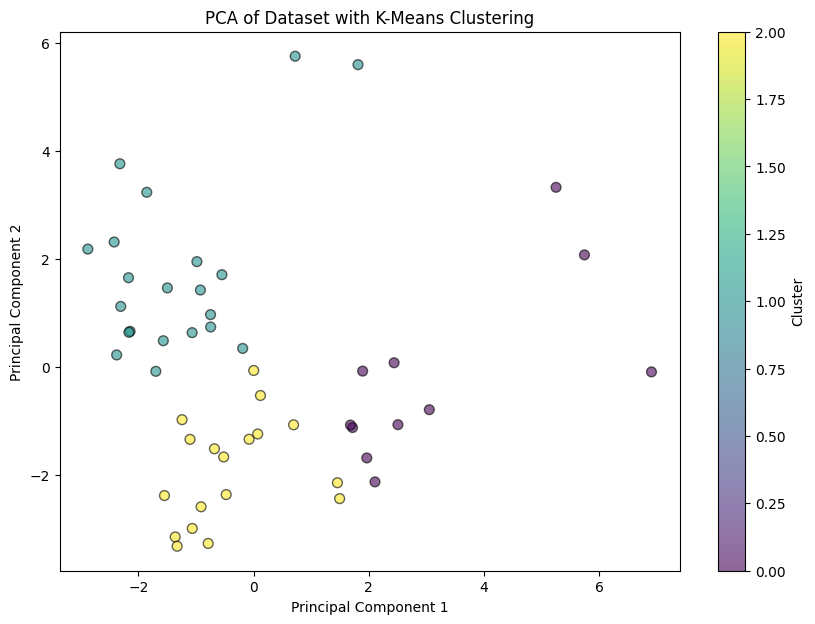

Explained variance by component: [0.04906217 0.04841299]


In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_filled' is your preprocessed DataFrame ready for PCA
# Note: Replace 'data_filled' with the actual variable name containing your prepared dataset

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

# PCA
pca = PCA(n_components=2)  # Reduce data to 2 dimensions for visualization purposes
pca_result = pca.fit_transform(data_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters, adjust based on your data
clusters = kmeans.fit_predict(pca_result)

# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset with K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Explained variance
print(f"Explained variance by component: {pca.explained_variance_ratio_}")
